In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

/home/jp/mambaforge/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from bmadx import M_ELECTRON
from bmadx.bmad_torch.track_torch import Beam
from beamline import create_6d_diagnostic_beamline
from generate_test_beam import generate_test_beam, generate_test_images
from pmd_beamphysics import ParticleGroup
from pytao import Tao

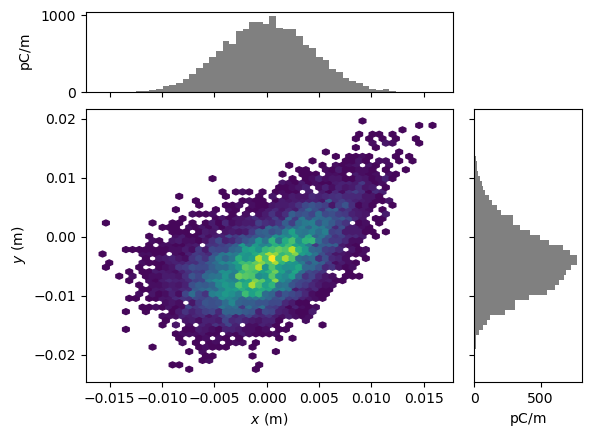

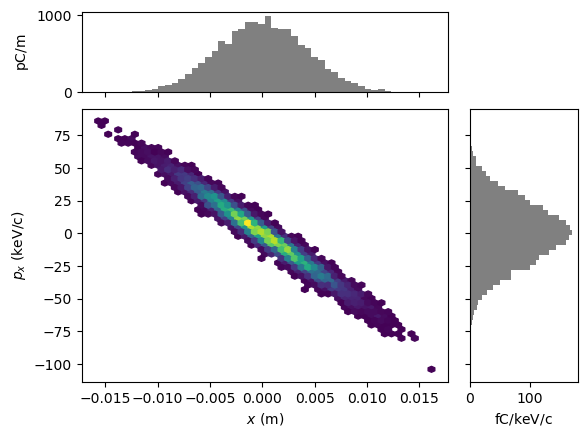

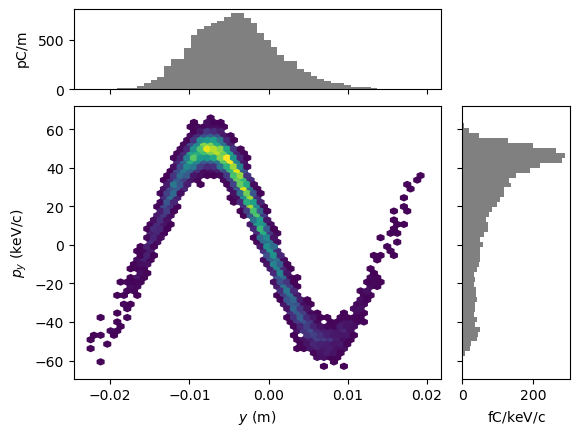

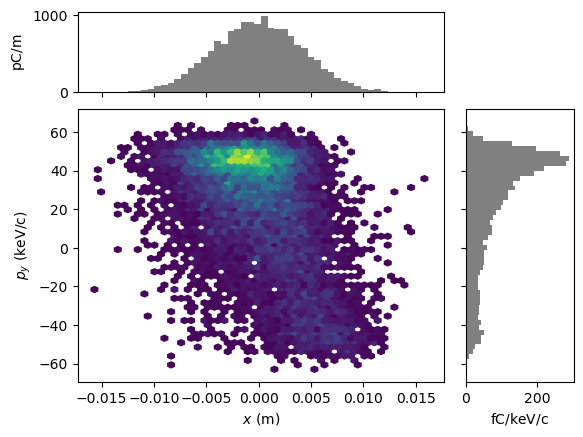

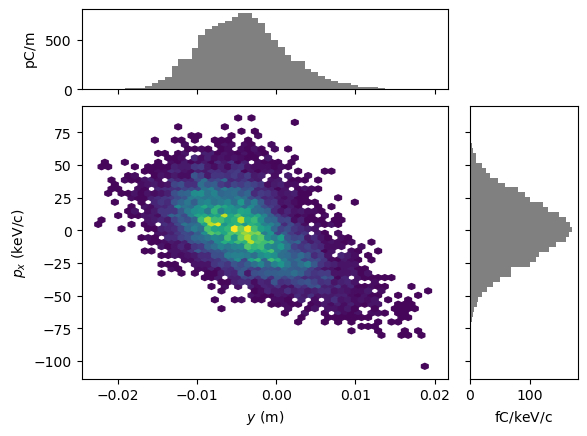

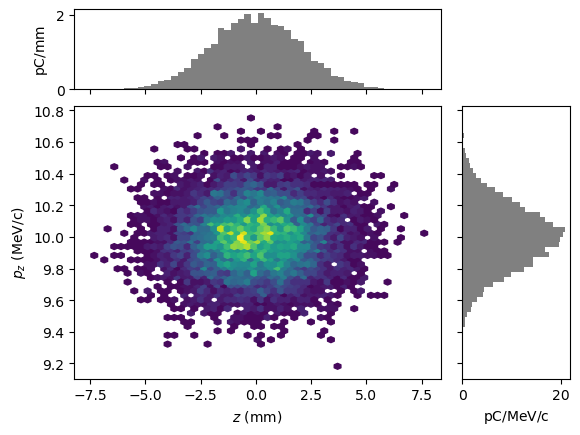

In [3]:
generate_test_beam()

In [4]:
beam_coords = torch.load("ground_truth_dist.pt")

In [5]:
pmd_par = ParticleGroup('pmd_par.h5')

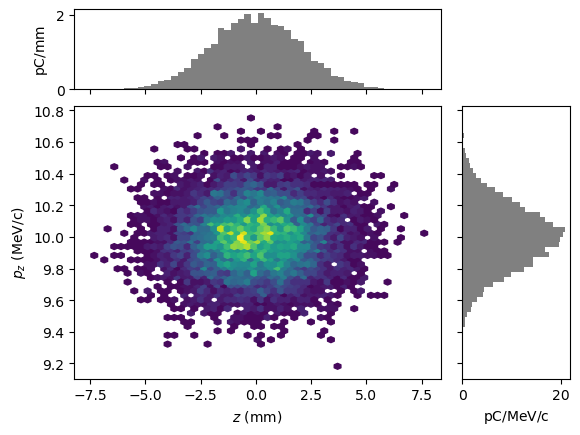

In [6]:
pmd_par.plot('z', 'pz')

In [7]:
# bmad lattice for comparison
tao = Tao('-init tao.init -noplot')  

In [8]:
tao.cmd('set global track_type = beam')

['[WARNING] calc_emittances_and_twiss_from_sigma_matrix:',
 '    Cannot normalize some eigenvectors.',
 '    Note: This can happen if the emittance of a normal mode is very small or zero.',
 '    This will throw off the emittance and other calculations.',
 '[WARNING] calc_emittances_and_twiss_from_sigma_matrix:',
 '    Cannot normalize some eigenvectors.',
 '    Note: This can happen if the emittance of a normal mode is very small or zero.',
 '    This will throw off the emittance and other calculations.',
 '[WARNING] tao_beam_track:',
 '    Beam parameters not computed at: BEGINNING  (0)',
 '    [This will happen with round beams. Ignore this problem if the beam parameters at problem locations are not needed.]',
 '    The singular sigma matrix is:',
 '        1.8000000E-05 -9.9964033E-06  1.3551099E-05 -6.0856164E-06  0.0000000E+00 -1.7899437E-07',
 '       -9.9964033E-06  5.7757286E-06 -7.5841116E-06  3.3981389E-06  0.0000000E+00  1.2832529E-07',
 '        1.3551099E-05 -7.5841116E-0

In [9]:
x_ini = tao.bunch1('beginning', 'x')
px_ini = tao.bunch1('beginning', 'px')
y_ini = tao.bunch1('beginning', 'y')
py_ini = tao.bunch1('beginning', 'py')
z_ini = tao.bunch1('beginning', 'z')
pz_ini = tao.bunch1('beginning', 'pz')

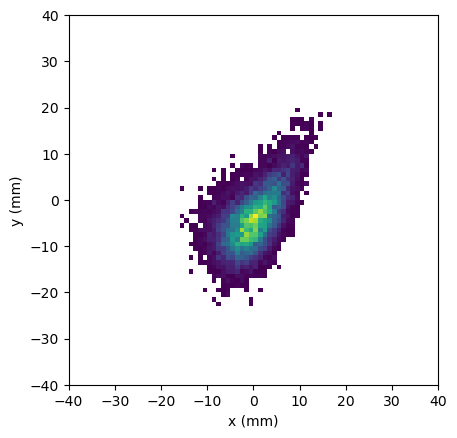

In [10]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*x_ini, y=1000*y_ini,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

In [11]:
x_tao = tao.bunch1('end', 'x')
px_tao = tao.bunch1('end', 'px')
y_tao = tao.bunch1('end', 'y')
py_tao = tao.bunch1('end', 'py')
z_tao = tao.bunch1('end', 'z')
pz_tao = tao.bunch1('end', 'pz')

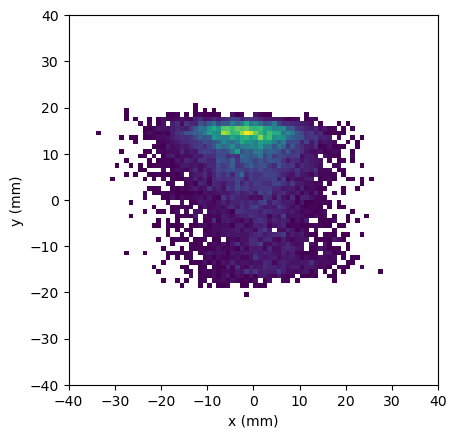

In [12]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*x_tao, y=1000*y_tao,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

In [13]:
coords_ini = torch.tensor(np.vstack((x_ini, 
                                     px_ini,
                                     y_ini,
                                     py_ini,
                                     z_ini,
                                     pz_ini)).T)

In [14]:
beam_in = Beam(
    coords_ini,
    s=torch.tensor(0.0),
    p0c=torch.tensor(10.0e6),
    mc2=torch.tensor(M_ELECTRON)
)

In [15]:
lattice = create_6d_diagnostic_beamline()
lattice.elements[0].K1.data = torch.tensor(-5)
beam_out = lattice(beam_in)

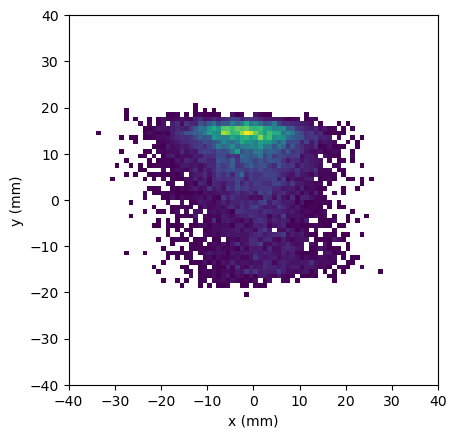

In [16]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*beam_out.x.numpy(), y=1000*beam_out.y.numpy(),  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

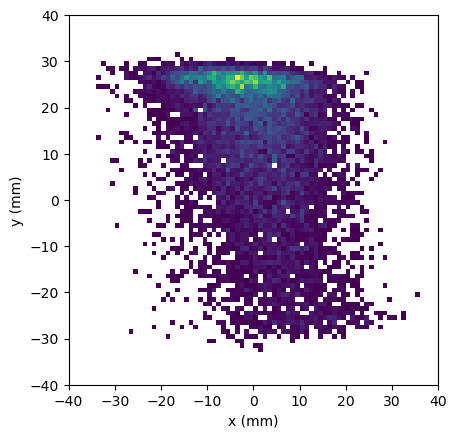

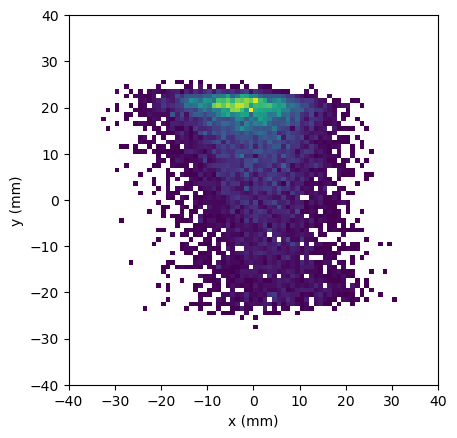

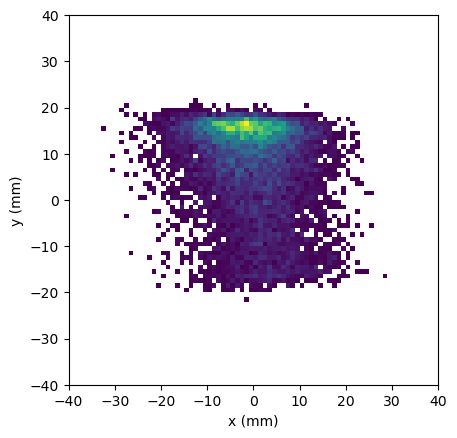

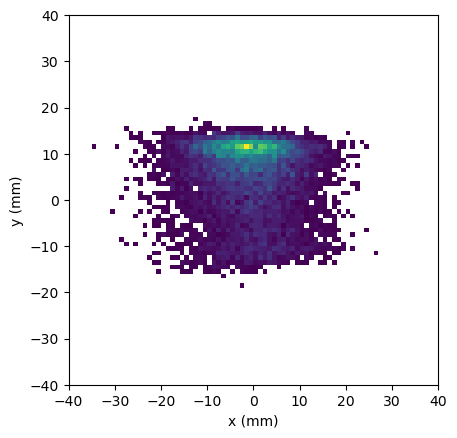

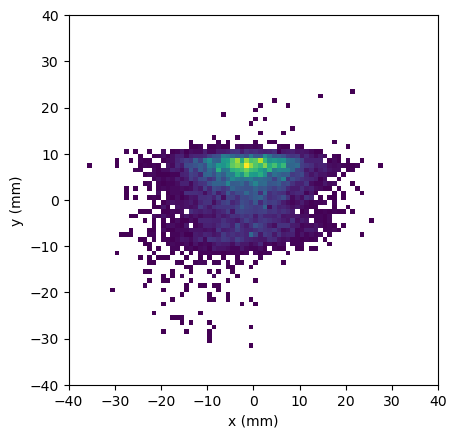

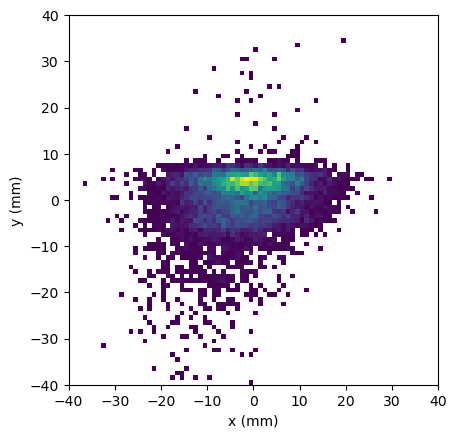

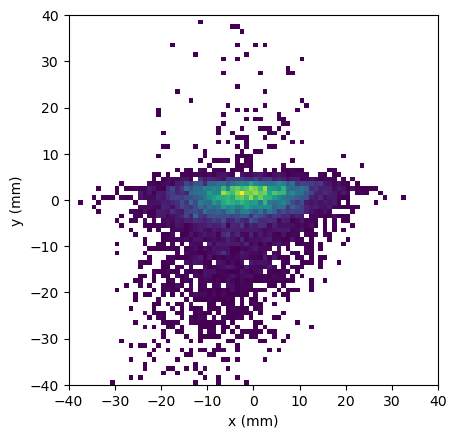

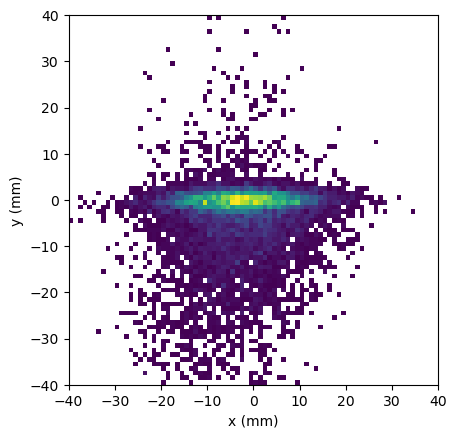

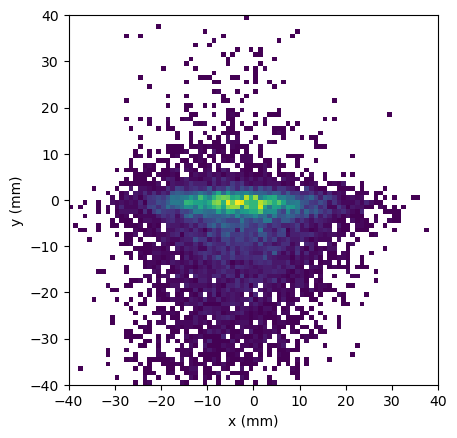

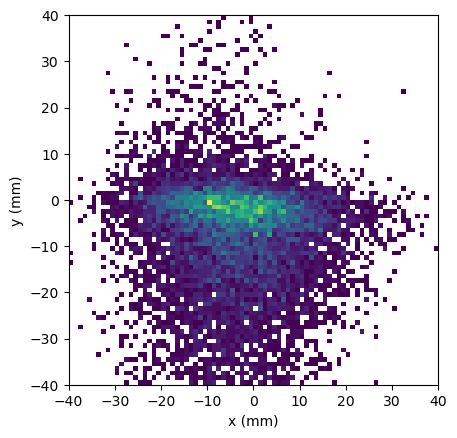

In [17]:
k1s = np.linspace(-10,10,10)
for k1 in k1s:
    lattice.elements[0].K1.data = torch.tensor(k1)
    beam_out = lattice(beam_in)
    fig, ax = plt.subplots()
    mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
    mycmap.set_under(color='white') # map 0 to this color
    myvmin = 1 # something tiny
    # Bin particles
    ax.hist2d(x=1000*beam_out.x.numpy(), y=1000*beam_out.y.numpy(),  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_aspect('equal')
    plt.show()

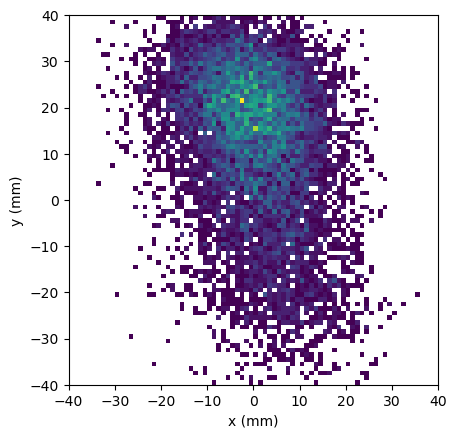

tensor([-10.], device='cuda:0') tensor(95.5342, device='cuda:0', dtype=torch.float64)


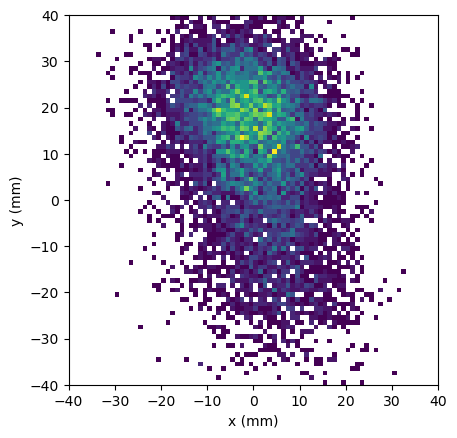

tensor([-8.9474], device='cuda:0') tensor(86.5824, device='cuda:0', dtype=torch.float64)


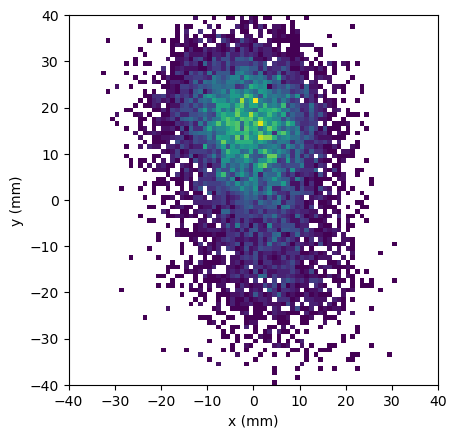

tensor([-7.8947], device='cuda:0') tensor(78.9730, device='cuda:0', dtype=torch.float64)


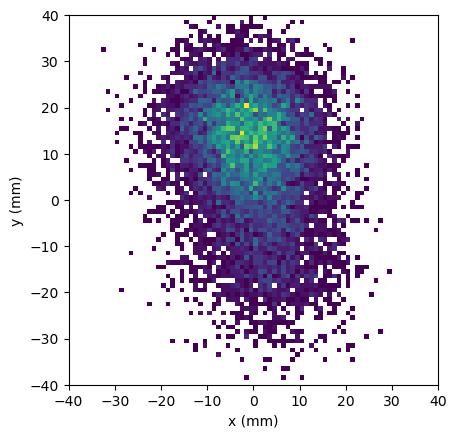

tensor([-6.8421], device='cuda:0') tensor(72.6905, device='cuda:0', dtype=torch.float64)


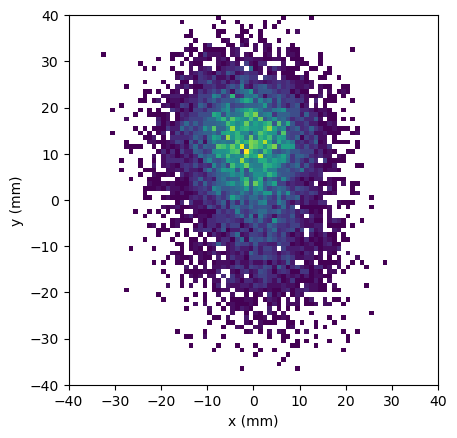

tensor([-5.7895], device='cuda:0') tensor(67.7200, device='cuda:0', dtype=torch.float64)


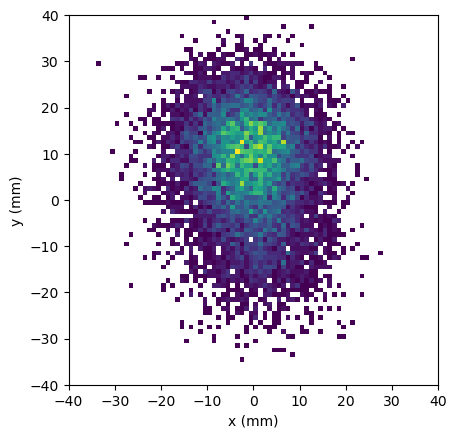

tensor([-4.7368], device='cuda:0') tensor(64.0463, device='cuda:0', dtype=torch.float64)


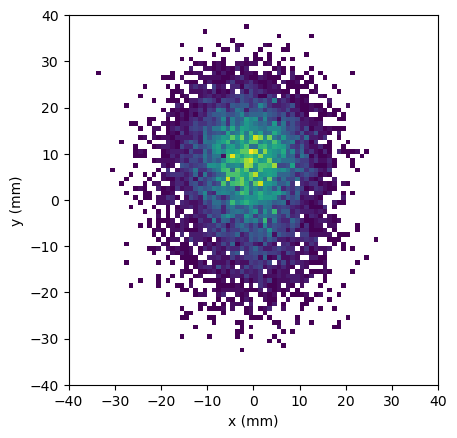

tensor([-3.6842], device='cuda:0') tensor(61.6546, device='cuda:0', dtype=torch.float64)


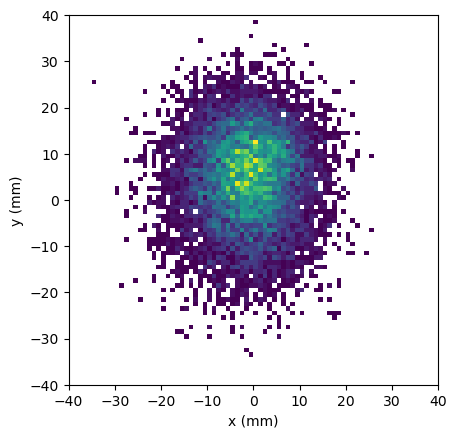

tensor([-2.6316], device='cuda:0') tensor(60.5302, device='cuda:0', dtype=torch.float64)


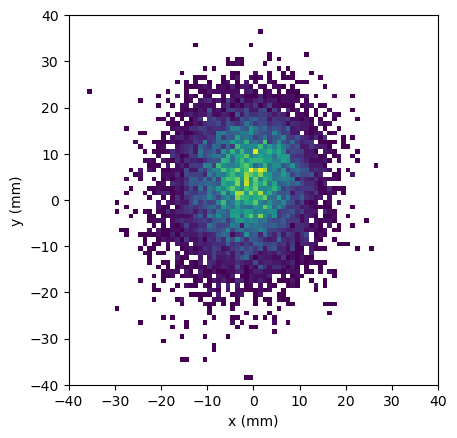

tensor([-1.5789], device='cuda:0') tensor(60.6585, device='cuda:0', dtype=torch.float64)


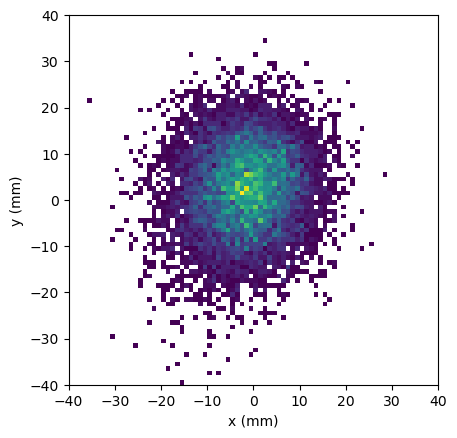

tensor([-0.5263], device='cuda:0') tensor(62.0250, device='cuda:0', dtype=torch.float64)


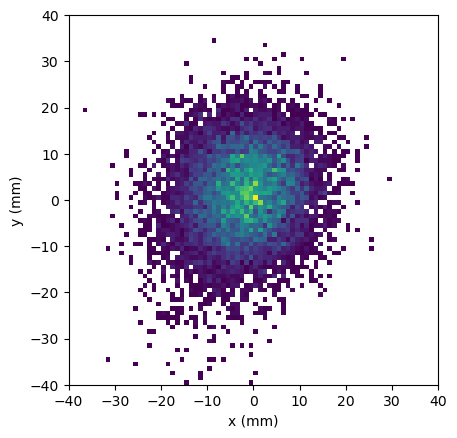

tensor([0.5263], device='cuda:0') tensor(64.6155, device='cuda:0', dtype=torch.float64)


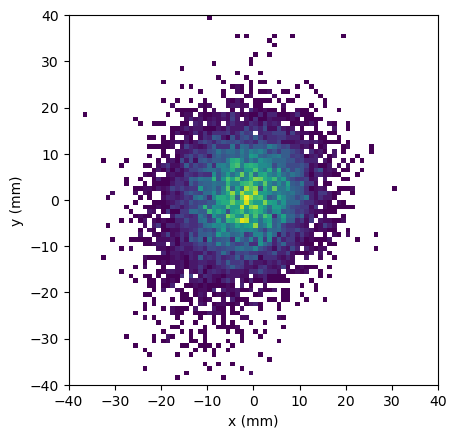

tensor([1.5789], device='cuda:0') tensor(68.4157, device='cuda:0', dtype=torch.float64)


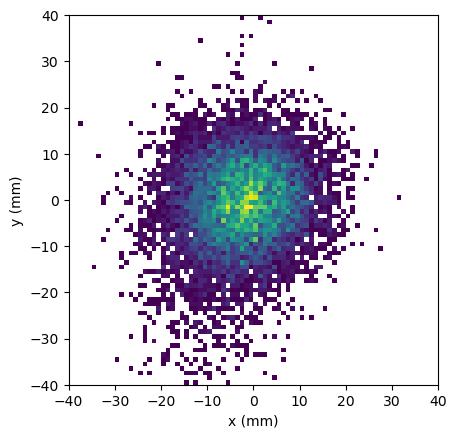

tensor([2.6316], device='cuda:0') tensor(73.4118, device='cuda:0', dtype=torch.float64)


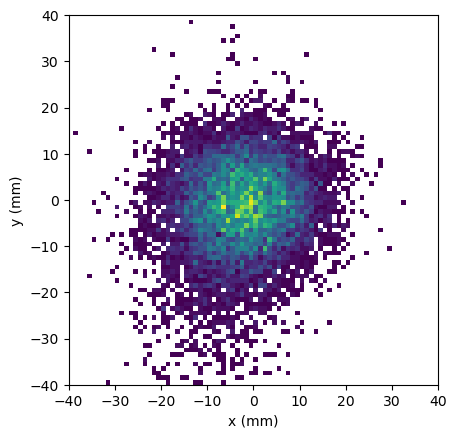

tensor([3.6842], device='cuda:0') tensor(79.5897, device='cuda:0', dtype=torch.float64)


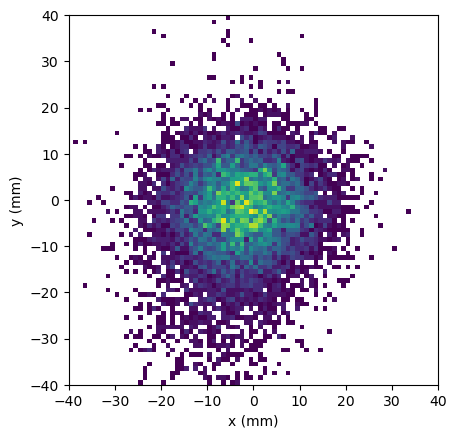

tensor([4.7368], device='cuda:0') tensor(86.9358, device='cuda:0', dtype=torch.float64)


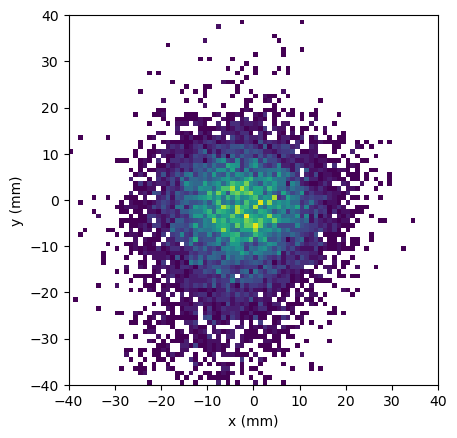

tensor([5.7895], device='cuda:0') tensor(95.4364, device='cuda:0', dtype=torch.float64)


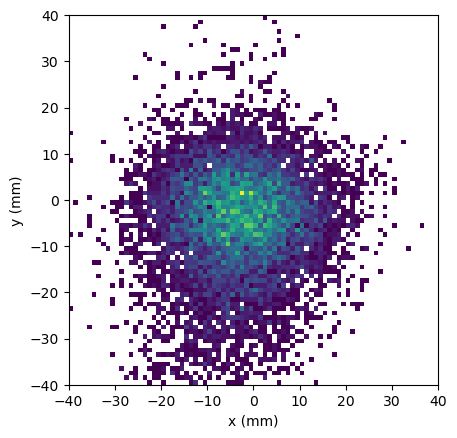

tensor([6.8421], device='cuda:0') tensor(105.0783, device='cuda:0', dtype=torch.float64)


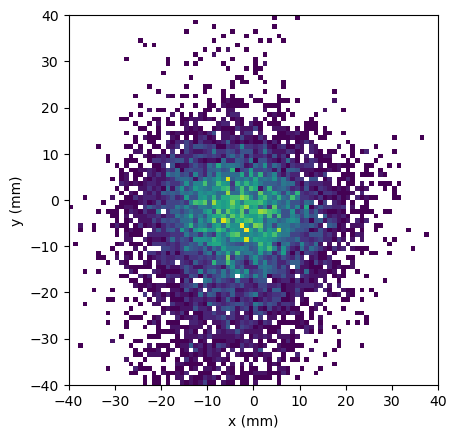

tensor([7.8947], device='cuda:0') tensor(115.8479, device='cuda:0', dtype=torch.float64)


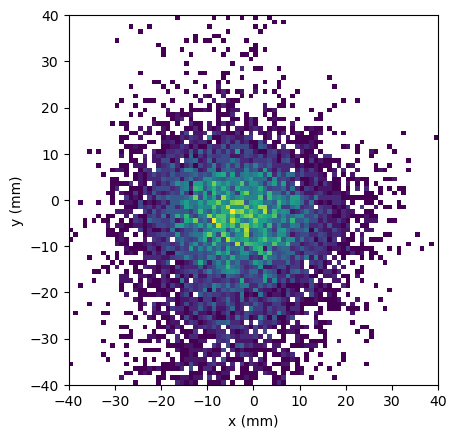

tensor([8.9474], device='cuda:0') tensor(127.7323, device='cuda:0', dtype=torch.float64)


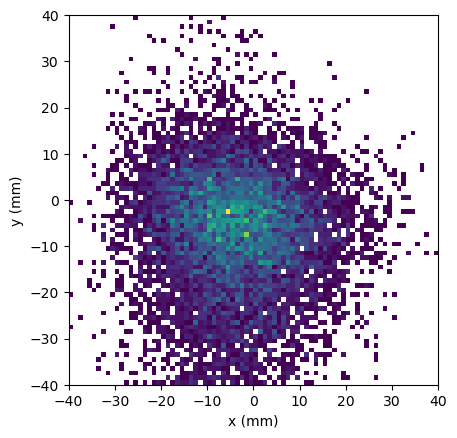

tensor([10.], device='cuda:0') tensor(140.7184, device='cuda:0', dtype=torch.float64)


In [18]:
from phase_space_reconstruction.histogram import histogram2d





tkwargs = {"device": "cuda", "dtype": torch.float32}
p0c = 10.0e6

beam_coords = torch.load("ground_truth_dist.pt")
input_beam = Beam(
    beam_coords,
    s=torch.tensor(0.0, **tkwargs),
    p0c=torch.tensor(p0c, **tkwargs),
    #p0c=torch.mean(beam_coords[:, -1]),
    mc2=torch.tensor(0.511e6, **tkwargs),
)

n_images = 20
k_in = torch.linspace(-10, 10, n_images, **tkwargs).unsqueeze(1)
bins = torch.linspace(-40, 40, 50, **tkwargs) * 1e-3

train_lattice = create_6d_diagnostic_beamline()
train_lattice.elements[0].K1.data = k_in

train_lattice = train_lattice.cuda()
#input_beam = beam_in.cuda()
input_beam = input_beam.cuda()
output_beam = train_lattice(input_beam)

screen_data = torch.cat(
    [ele.unsqueeze(-1) for ele in [output_beam.x, output_beam.y]], dim=-1
).cpu().float()

# do histogramming
images = []
bins = bins.cpu()
bin_width = bins[1]-bins[0]
bandwidth = bin_width.cpu() / 2
for i in range(n_images):
    hist = histogram2d(screen_data[i].T[0], screen_data[i].T[1], bins, bandwidth)
    images.append(hist)

images = torch.cat([ele.unsqueeze(0) for ele in images], dim=0)

mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
for i in range(0, len(images)):
    fig, ax = plt.subplots()

    myvmin = 1 # something tiny
    # Bin particles
    ax.hist2d(x=1000*output_beam.x[i].detach().cpu().numpy(), y=1000*output_beam.y[i].detach().cpu().numpy(),  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_aspect('equal')
    plt.show()  
    #plt.figure()
    #plt.imshow(images[i])

#        plt.figure()
#        plt.hist(output_beam.x[i].detach().cpu().numpy())
#        plt.hist(output_beam.y[i].detach().cpu().numpy())

    print(k_in[i], torch.std(output_beam.x[i])**2 * 1e6)


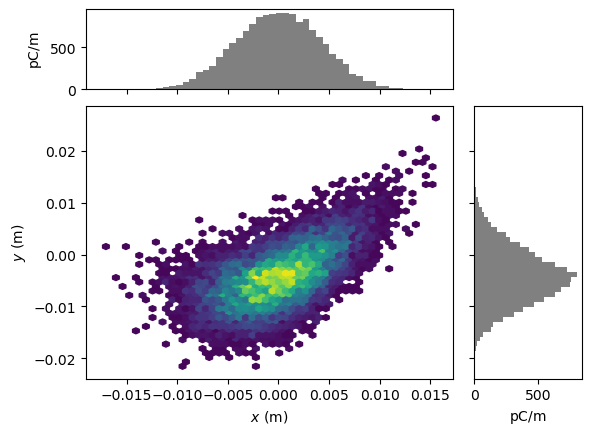

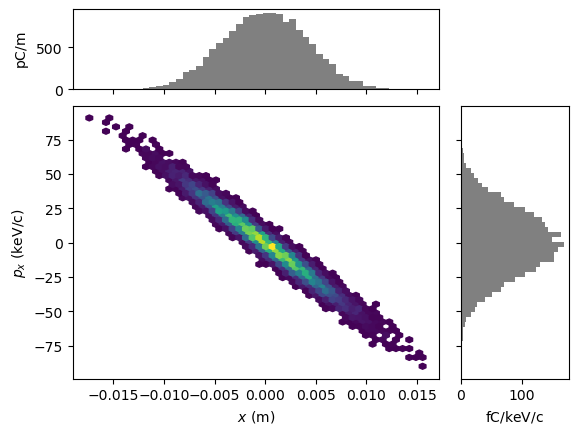

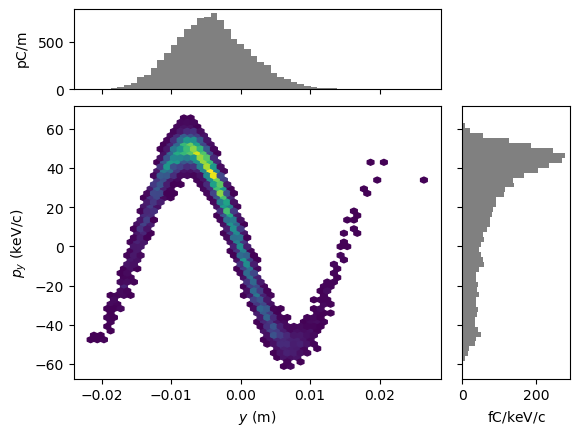

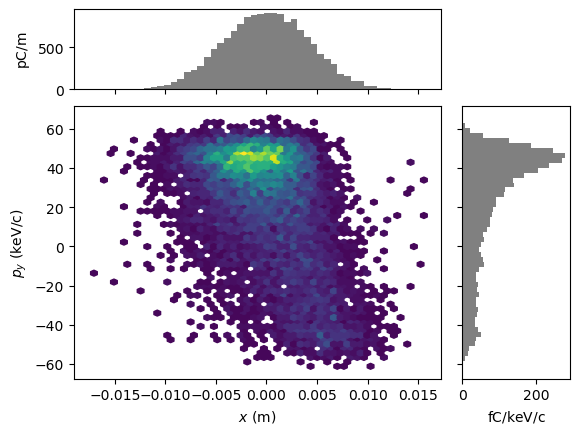

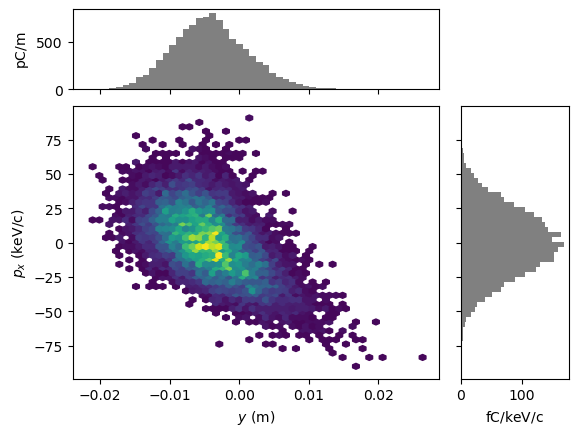

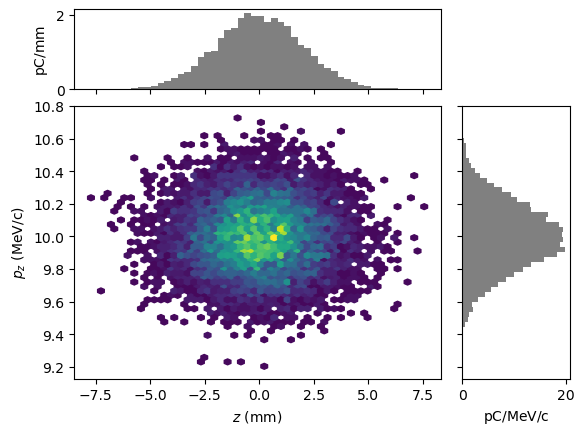

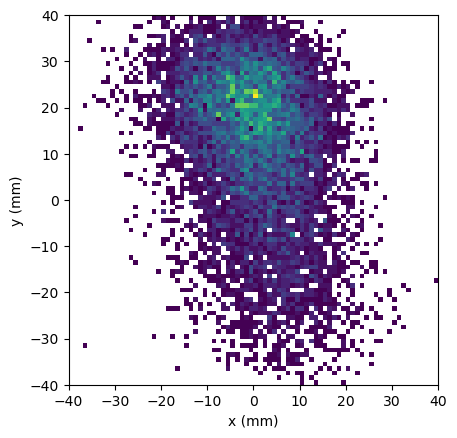

tensor([-10.], device='cuda:0') tensor(95.8917, device='cuda:0', dtype=torch.float64)


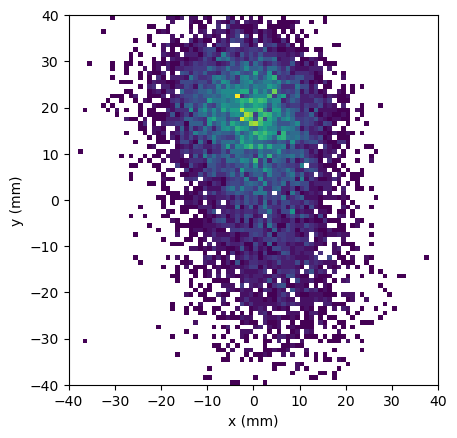

tensor([-8.9474], device='cuda:0') tensor(86.9424, device='cuda:0', dtype=torch.float64)


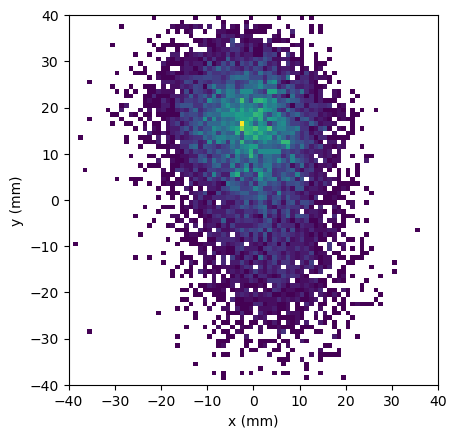

tensor([-7.8947], device='cuda:0') tensor(79.3366, device='cuda:0', dtype=torch.float64)


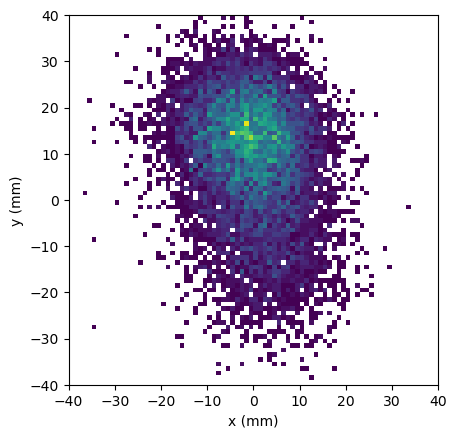

tensor([-6.8421], device='cuda:0') tensor(73.0591, device='cuda:0', dtype=torch.float64)


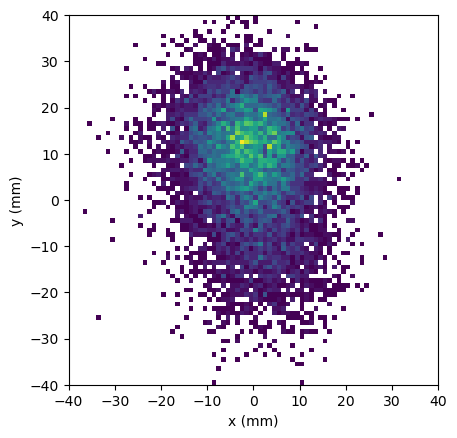

tensor([-5.7895], device='cuda:0') tensor(68.0947, device='cuda:0', dtype=torch.float64)


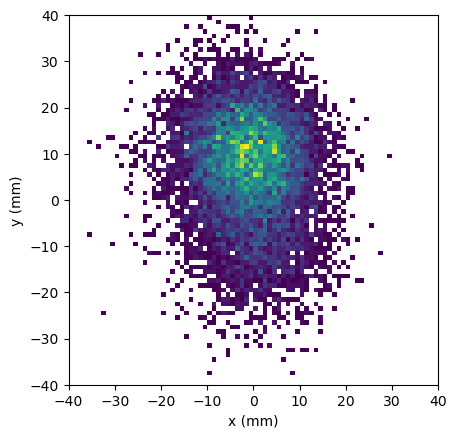

tensor([-4.7368], device='cuda:0') tensor(64.4284, device='cuda:0', dtype=torch.float64)


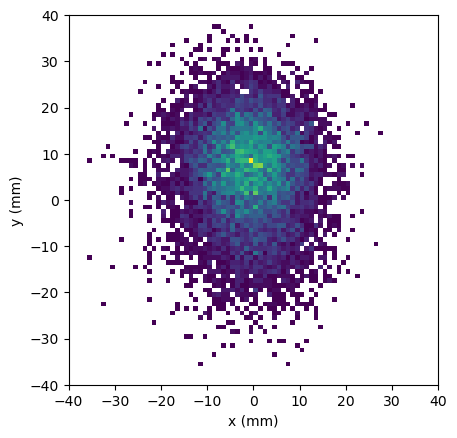

tensor([-3.6842], device='cuda:0') tensor(62.0456, device='cuda:0', dtype=torch.float64)


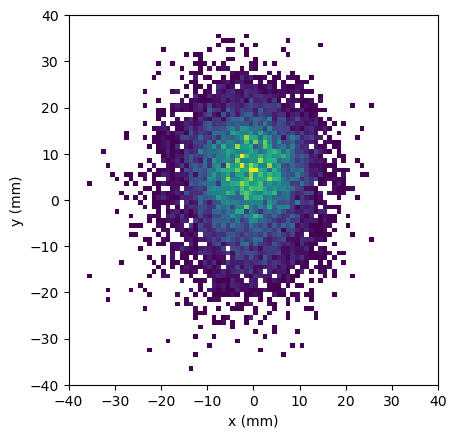

tensor([-2.6316], device='cuda:0') tensor(60.9314, device='cuda:0', dtype=torch.float64)


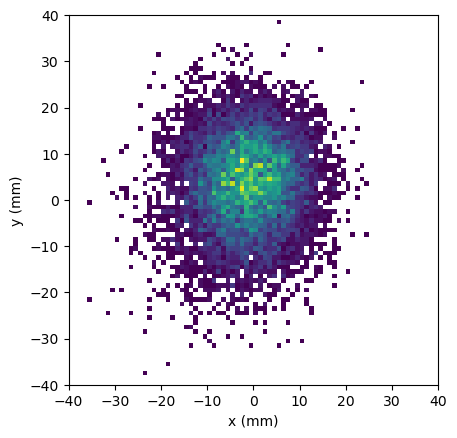

tensor([-1.5789], device='cuda:0') tensor(61.0713, device='cuda:0', dtype=torch.float64)


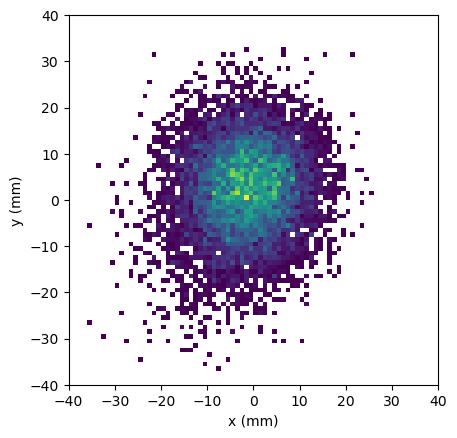

tensor([-0.5263], device='cuda:0') tensor(62.4511, device='cuda:0', dtype=torch.float64)


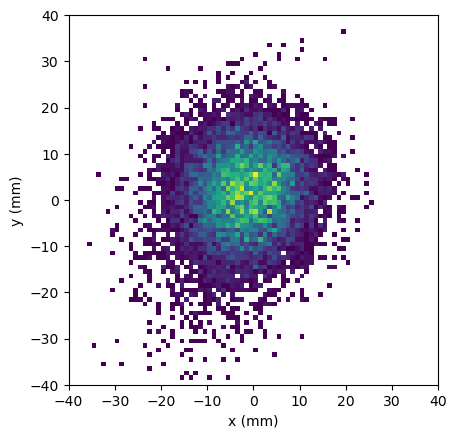

tensor([0.5263], device='cuda:0') tensor(65.0563, device='cuda:0', dtype=torch.float64)


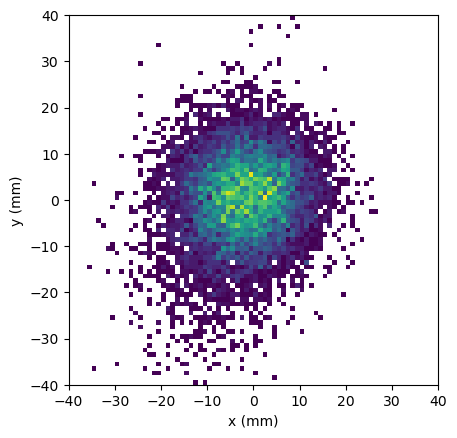

tensor([1.5789], device='cuda:0') tensor(68.8730, device='cuda:0', dtype=torch.float64)


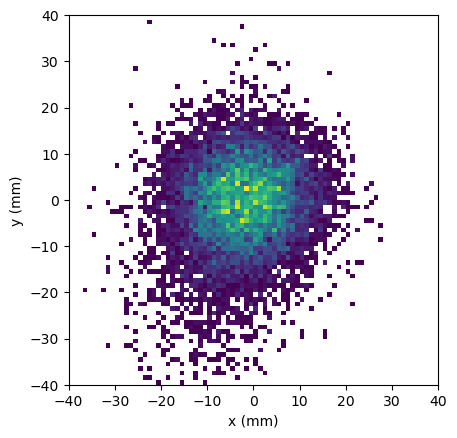

tensor([2.6316], device='cuda:0') tensor(73.8871, device='cuda:0', dtype=torch.float64)


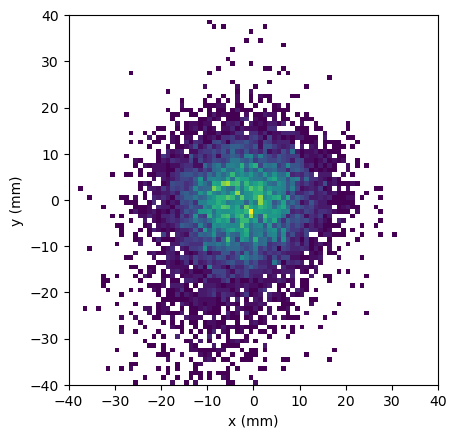

tensor([3.6842], device='cuda:0') tensor(80.0848, device='cuda:0', dtype=torch.float64)


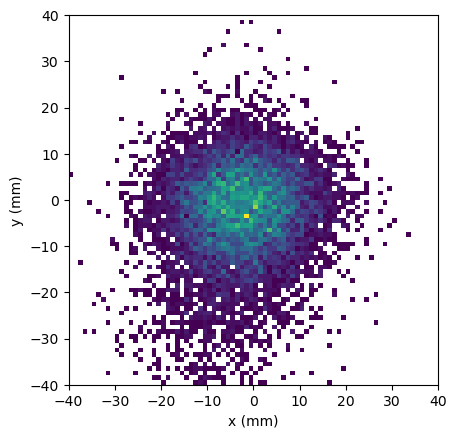

tensor([4.7368], device='cuda:0') tensor(87.4524, device='cuda:0', dtype=torch.float64)


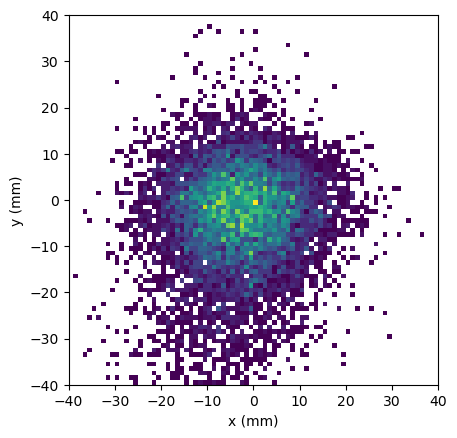

tensor([5.7895], device='cuda:0') tensor(95.9765, device='cuda:0', dtype=torch.float64)


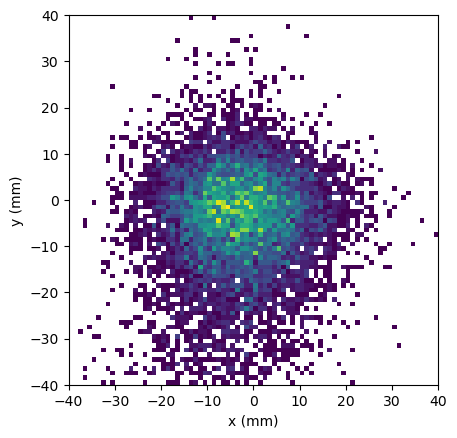

tensor([6.8421], device='cuda:0') tensor(105.6437, device='cuda:0', dtype=torch.float64)


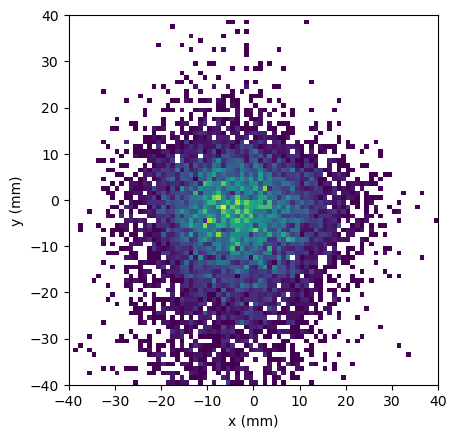

tensor([7.8947], device='cuda:0') tensor(116.4406, device='cuda:0', dtype=torch.float64)


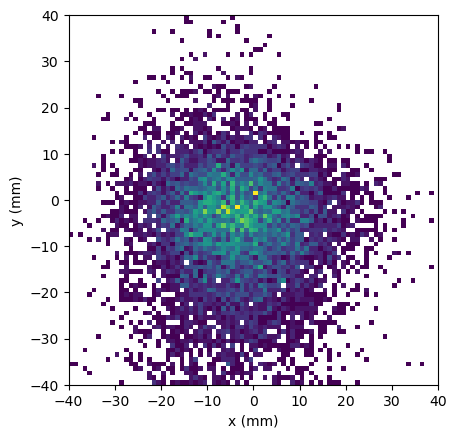

tensor([8.9474], device='cuda:0') tensor(128.3543, device='cuda:0', dtype=torch.float64)


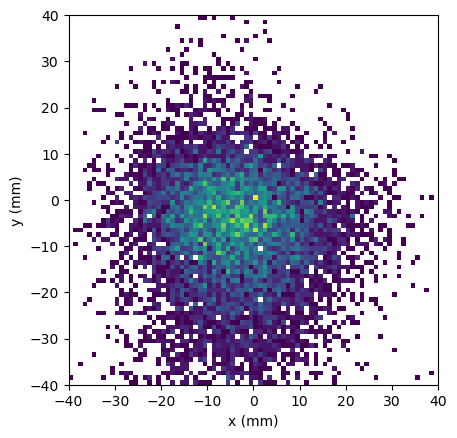

tensor([10.], device='cuda:0') tensor(141.3717, device='cuda:0', dtype=torch.float64)


/home/jp/mambaforge/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [19]:
generate_test_images()

In [20]:
from fitting3 import train_single_model

0 tensor(67724968., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(9169111., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(8825533., device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(8559084., device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(8541145., device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(8129475.5000, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(7908784., device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(7884868., device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(7741805., device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(7664705.5000, device='cuda:0', grad_fn=<MulBackward0>)


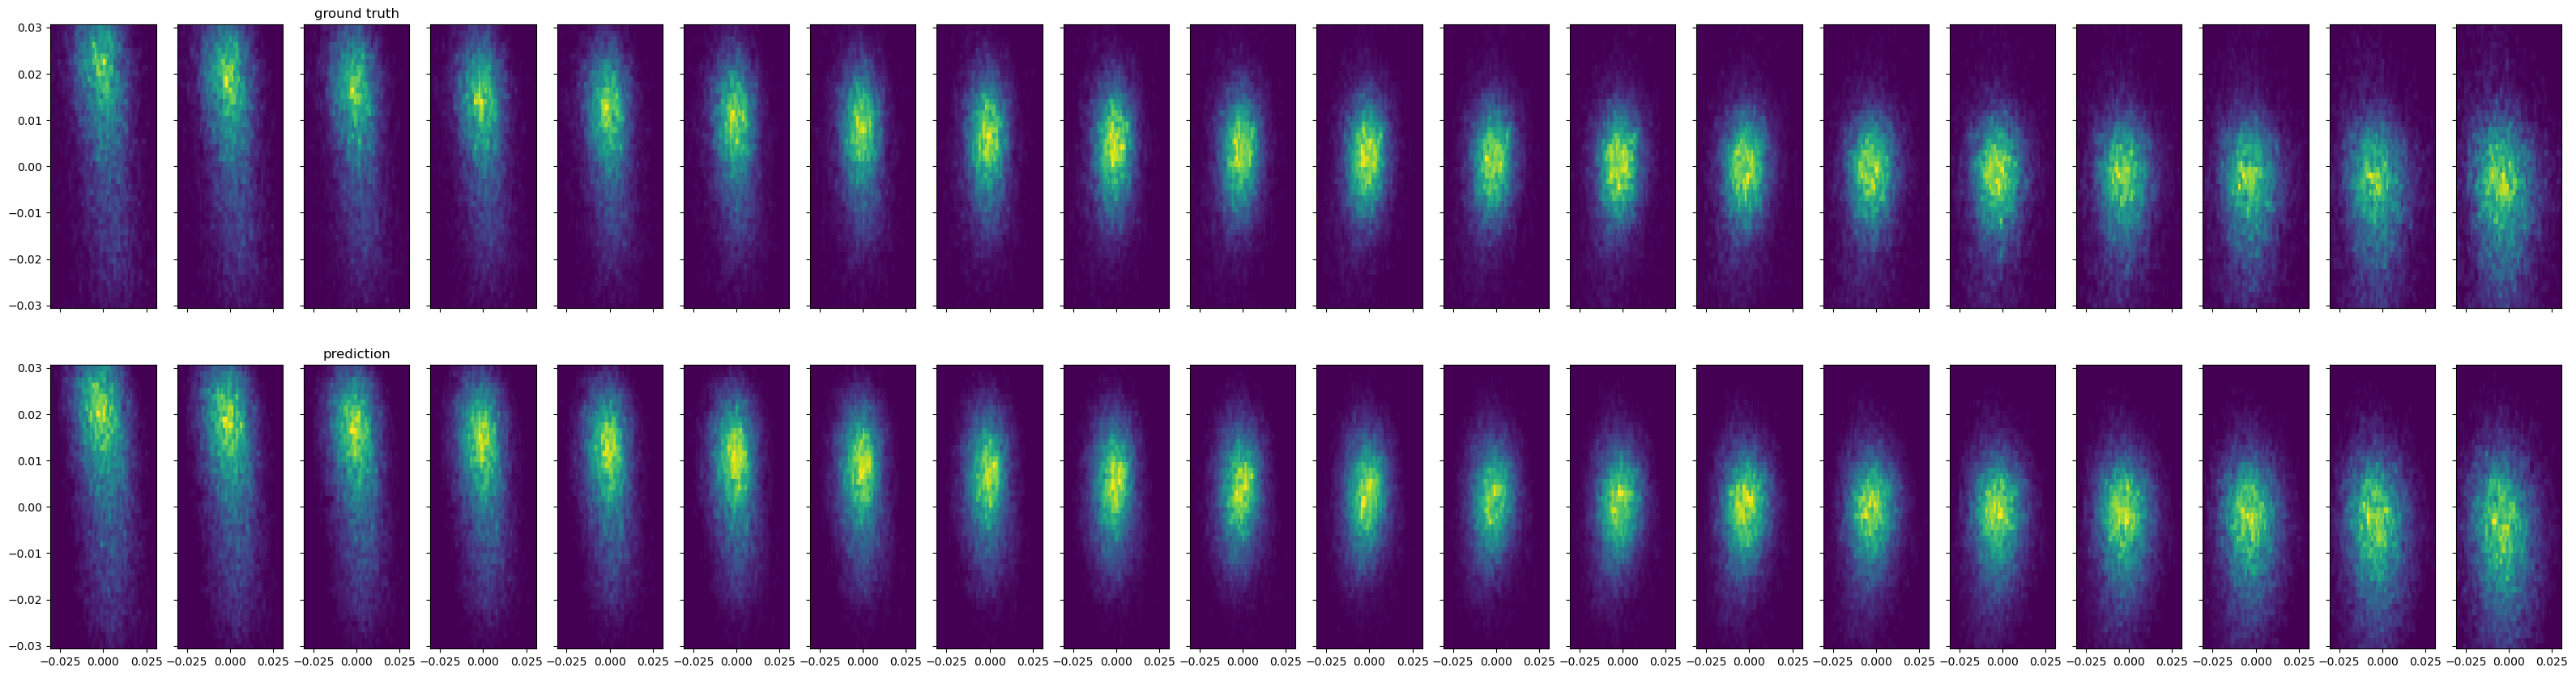

In [21]:
train_single_model()